In [1]:
import pandas as pd
import re
import jieba
from snownlp import SnowNLP
import matplotlib.pyplot as plt
from gensim import corpora, models
from gensim.models import CoherenceModel
#import pyLDAvis.gensim_models
from wordcloud import WordCloud


In [2]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim



In [ ]:

# 图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['simsun']

# 加载停用词
def load_stopwords():
    with open('stopwords.txt', 'r', encoding='utf-8') as file:
        stopwords = [line.strip() for line in file.readlines()]
    return set(stopwords)

# 预处理函数
def preprocess_text(text, stopwords):
    # 去除中英文以外的字符
    text = re.sub(r'[^a-zA-Z\u4e00-\u9fa5]', ' ', text)
    # 使用Jieba分词
    words = jieba.lcut(text)
    # 去除停用词
    words = [word for word in words if word not in stopwords]
    return ' '.join(words)

# 情感分析
def sentiment_analysis(df):
    df['sentiment_score'] = df['comment'].apply(lambda x: SnowNLP(x).sentiments)
    # 分类为积极、消极和中性
    df['sentiment_category'] = pd.cut(df['sentiment_score'], bins=[0, 0.4, 0.6, 1],
                                      labels=['消极', '中性', '积极'])
    # 可视化
    sentiment_counts = df['sentiment_category'].value_counts()
    plt.figure(figsize=(10, 6))
    plt.bar(sentiment_counts.index, sentiment_counts.values)
    plt.xlabel('情感类别')
    plt.ylabel('数量')
    plt.title('情感分析结果分布')
    plt.show()
    return df


# 词云图
def generate_wordcloud(df):
    all_text = ' '.join(df['preprocessed_text'])
    wordcloud = WordCloud(font_path='C:\Windows\Fonts\simsun.ttc', width=800, height=400, background_color='white').generate(all_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('词云图')
    plt.show()

<>:69: DeprecationWarning: invalid escape sequence '\W'
<>:69: DeprecationWarning: invalid escape sequence '\W'
C:\Users\qiao\AppData\Local\Temp\ipykernel_17464\1572524678.py:69: DeprecationWarning: invalid escape sequence '\W'
  wordcloud = WordCloud(font_path='C:\Windows\Fonts\simsun.ttc', width=800, height=400, background_color='white').generate(all_text)


In [7]:
# 读取文件
df = pd.read_csv('6th.csv')

# 划分数据
all_data = df.copy()
love_data = df[df['tag'].str.contains('爱情', na=False)]
non_love_data = df[~df['tag'].str.contains('爱情', na=False)]

# 预处理
stopwords = load_stopwords()
all_data['preprocessed_text'] = all_data['comment'].apply(lambda x: preprocess_text(x, stopwords))
love_data['preprocessed_text'] = love_data['comment'].apply(lambda x: preprocess_text(x, stopwords))
non_love_data['preprocessed_text'] = non_love_data['comment'].apply(lambda x: preprocess_text(x, stopwords))


C:\Users\qiao\AppData\Local\Temp\ipykernel_17464\4049505560.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  love_data['preprocessed_text'] = love_data['comment'].apply(lambda x: preprocess_text(x, stopwords))
C:\Users\qiao\AppData\Local\Temp\ipykernel_17464\4049505560.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_love_data['preprocessed_text'] = non_love_data['comment'].apply(lambda x: preprocess_text(x, stopwords))


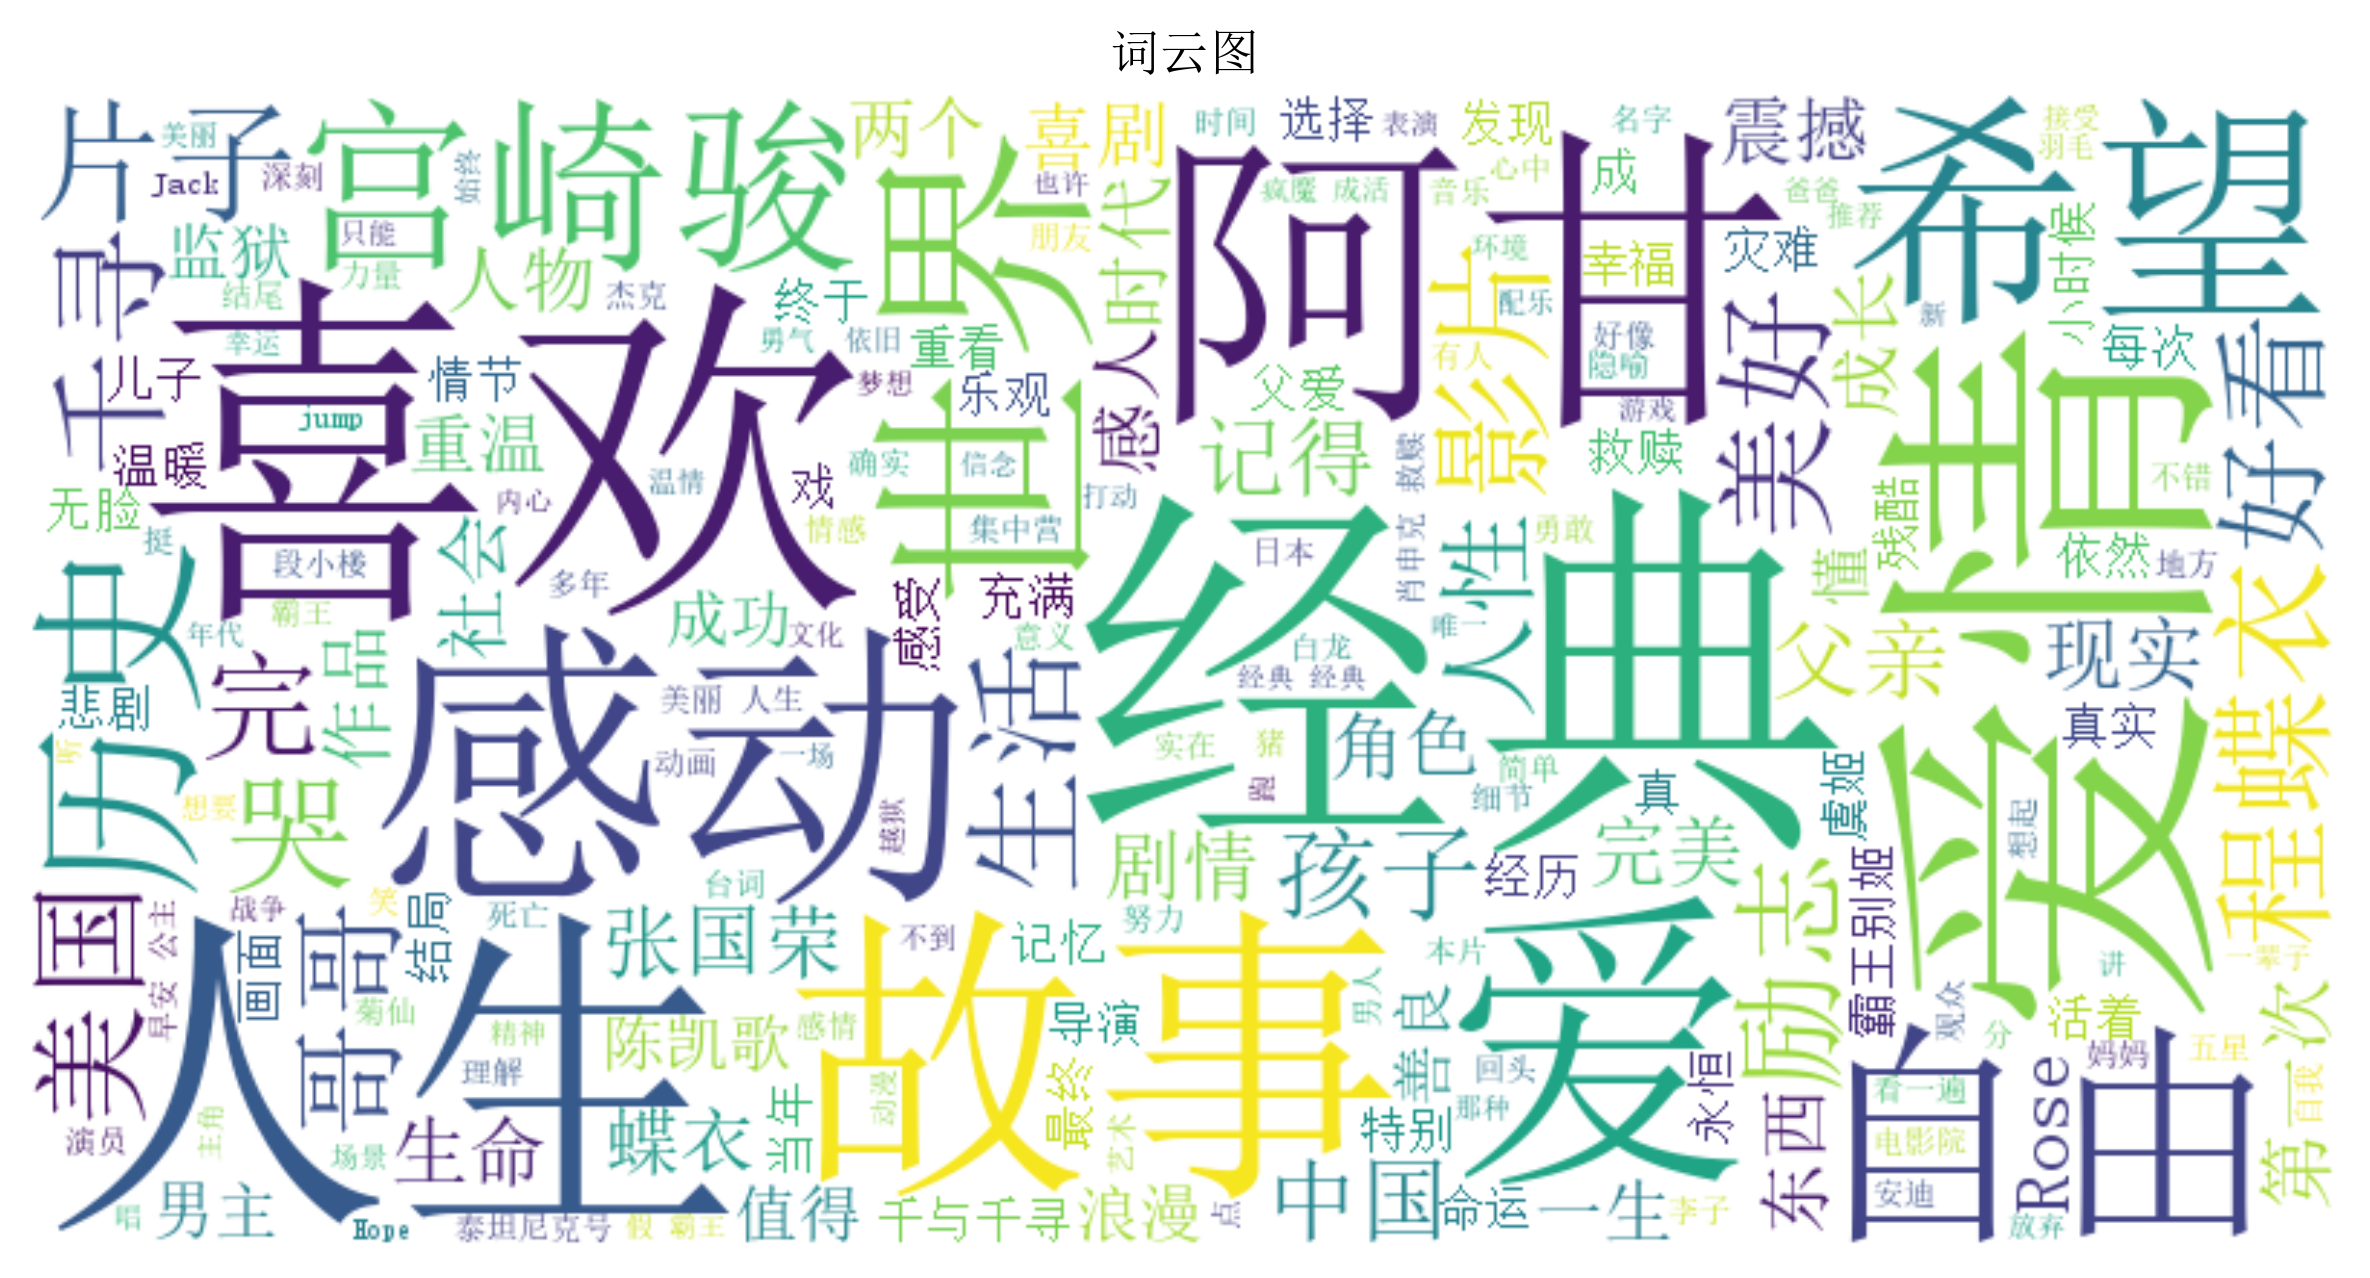

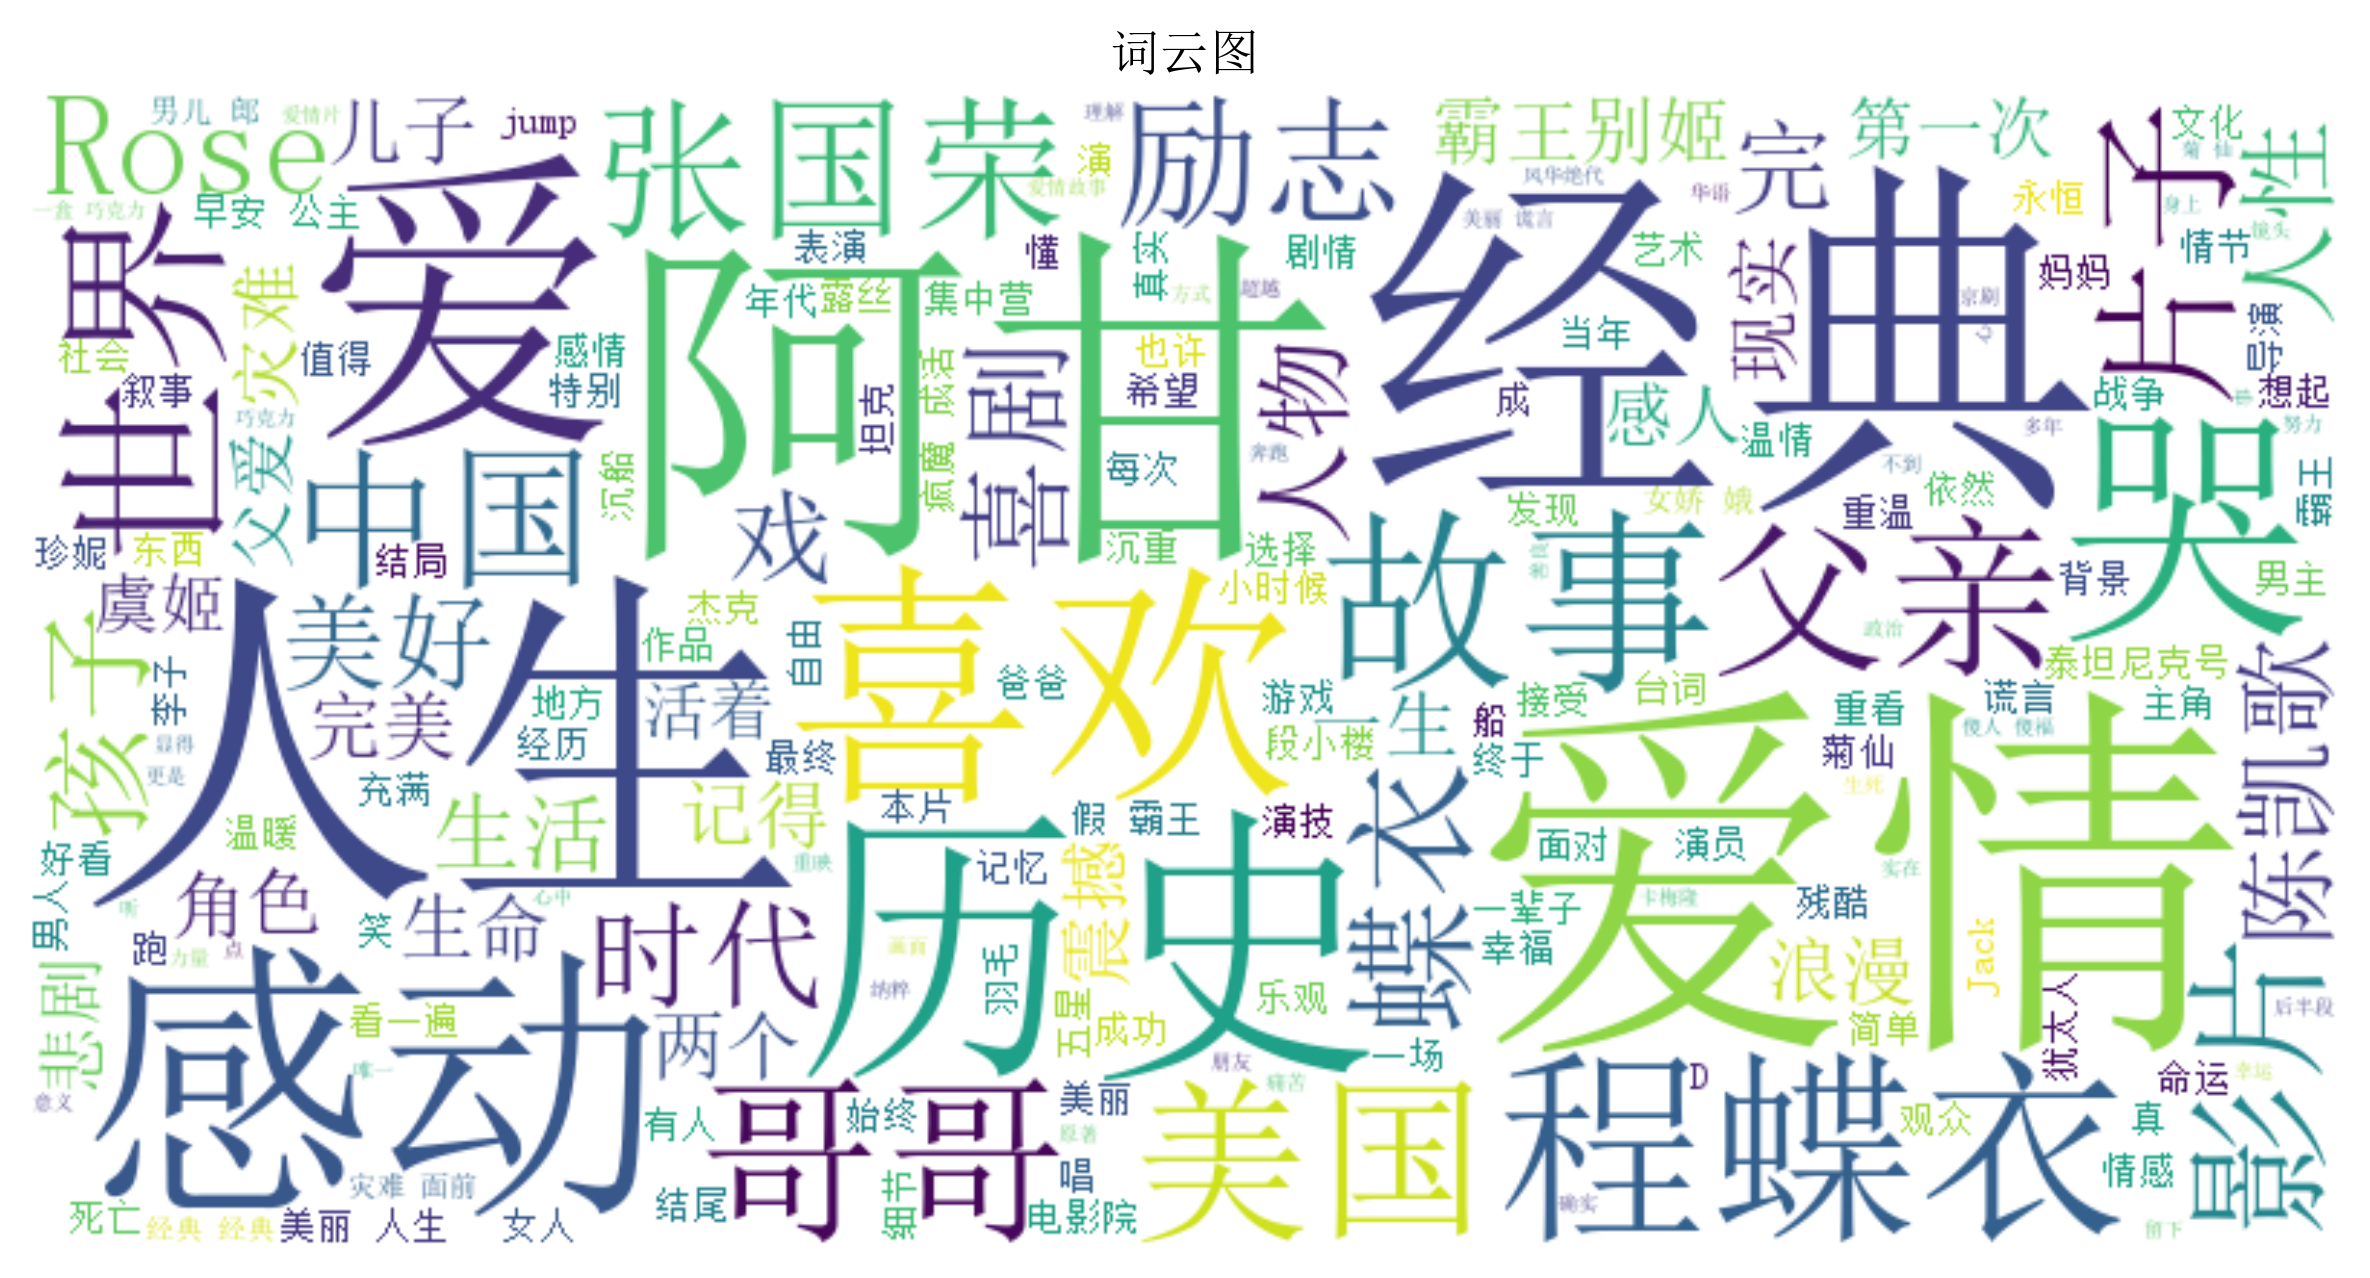

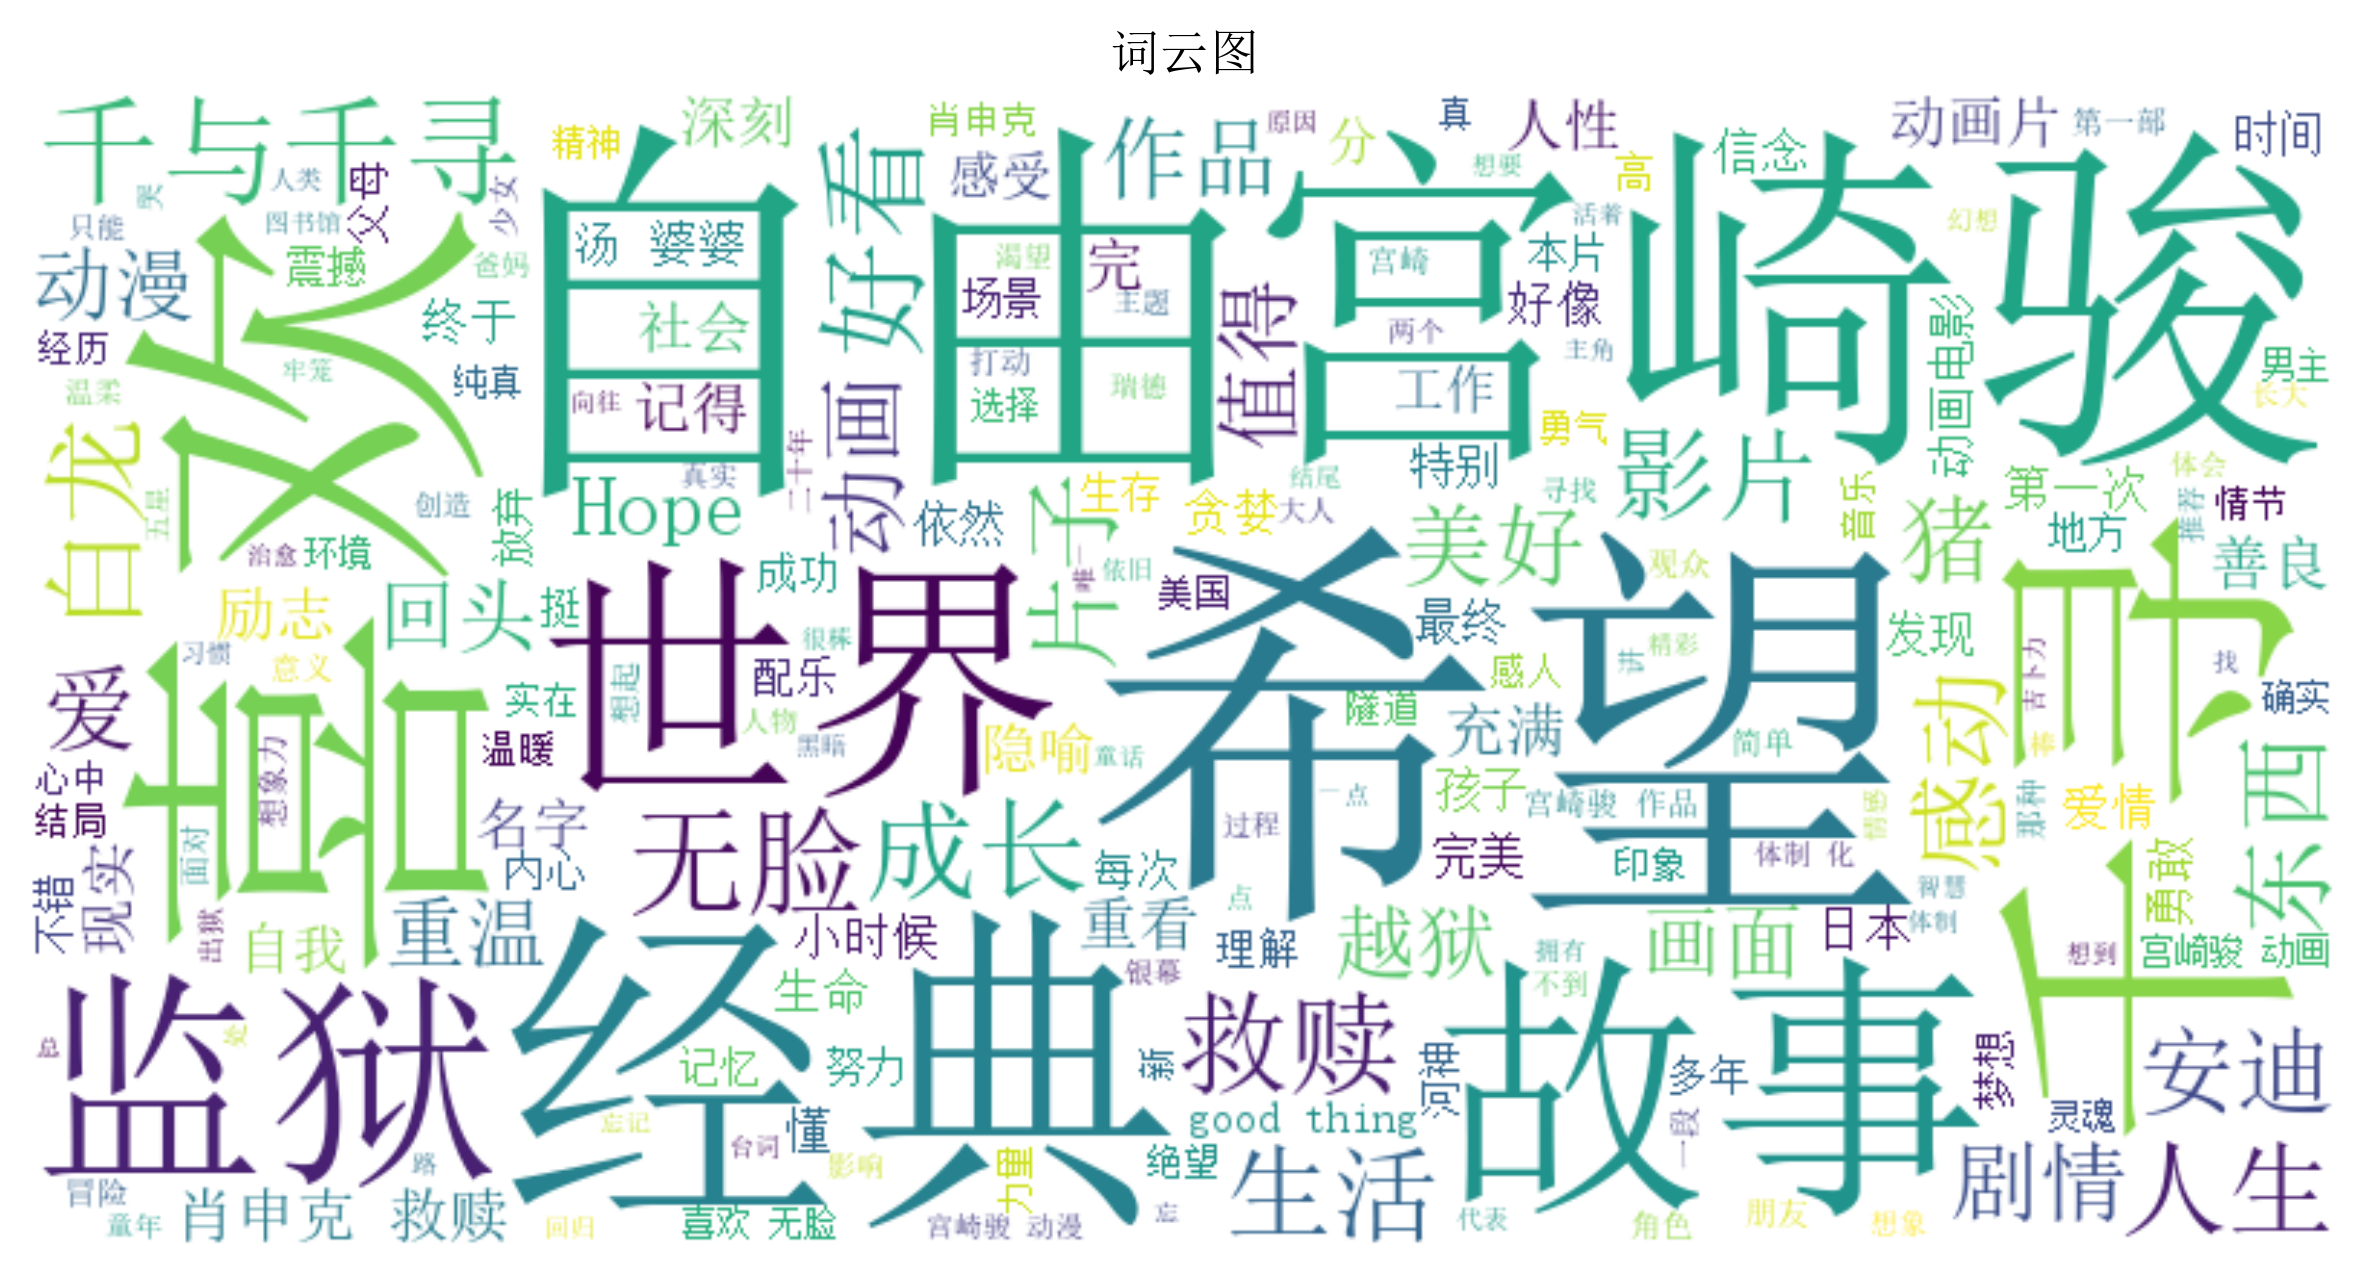

In [32]:
# 生成词云图
generate_wordcloud(all_data)
generate_wordcloud(love_data)
generate_wordcloud(non_love_data)

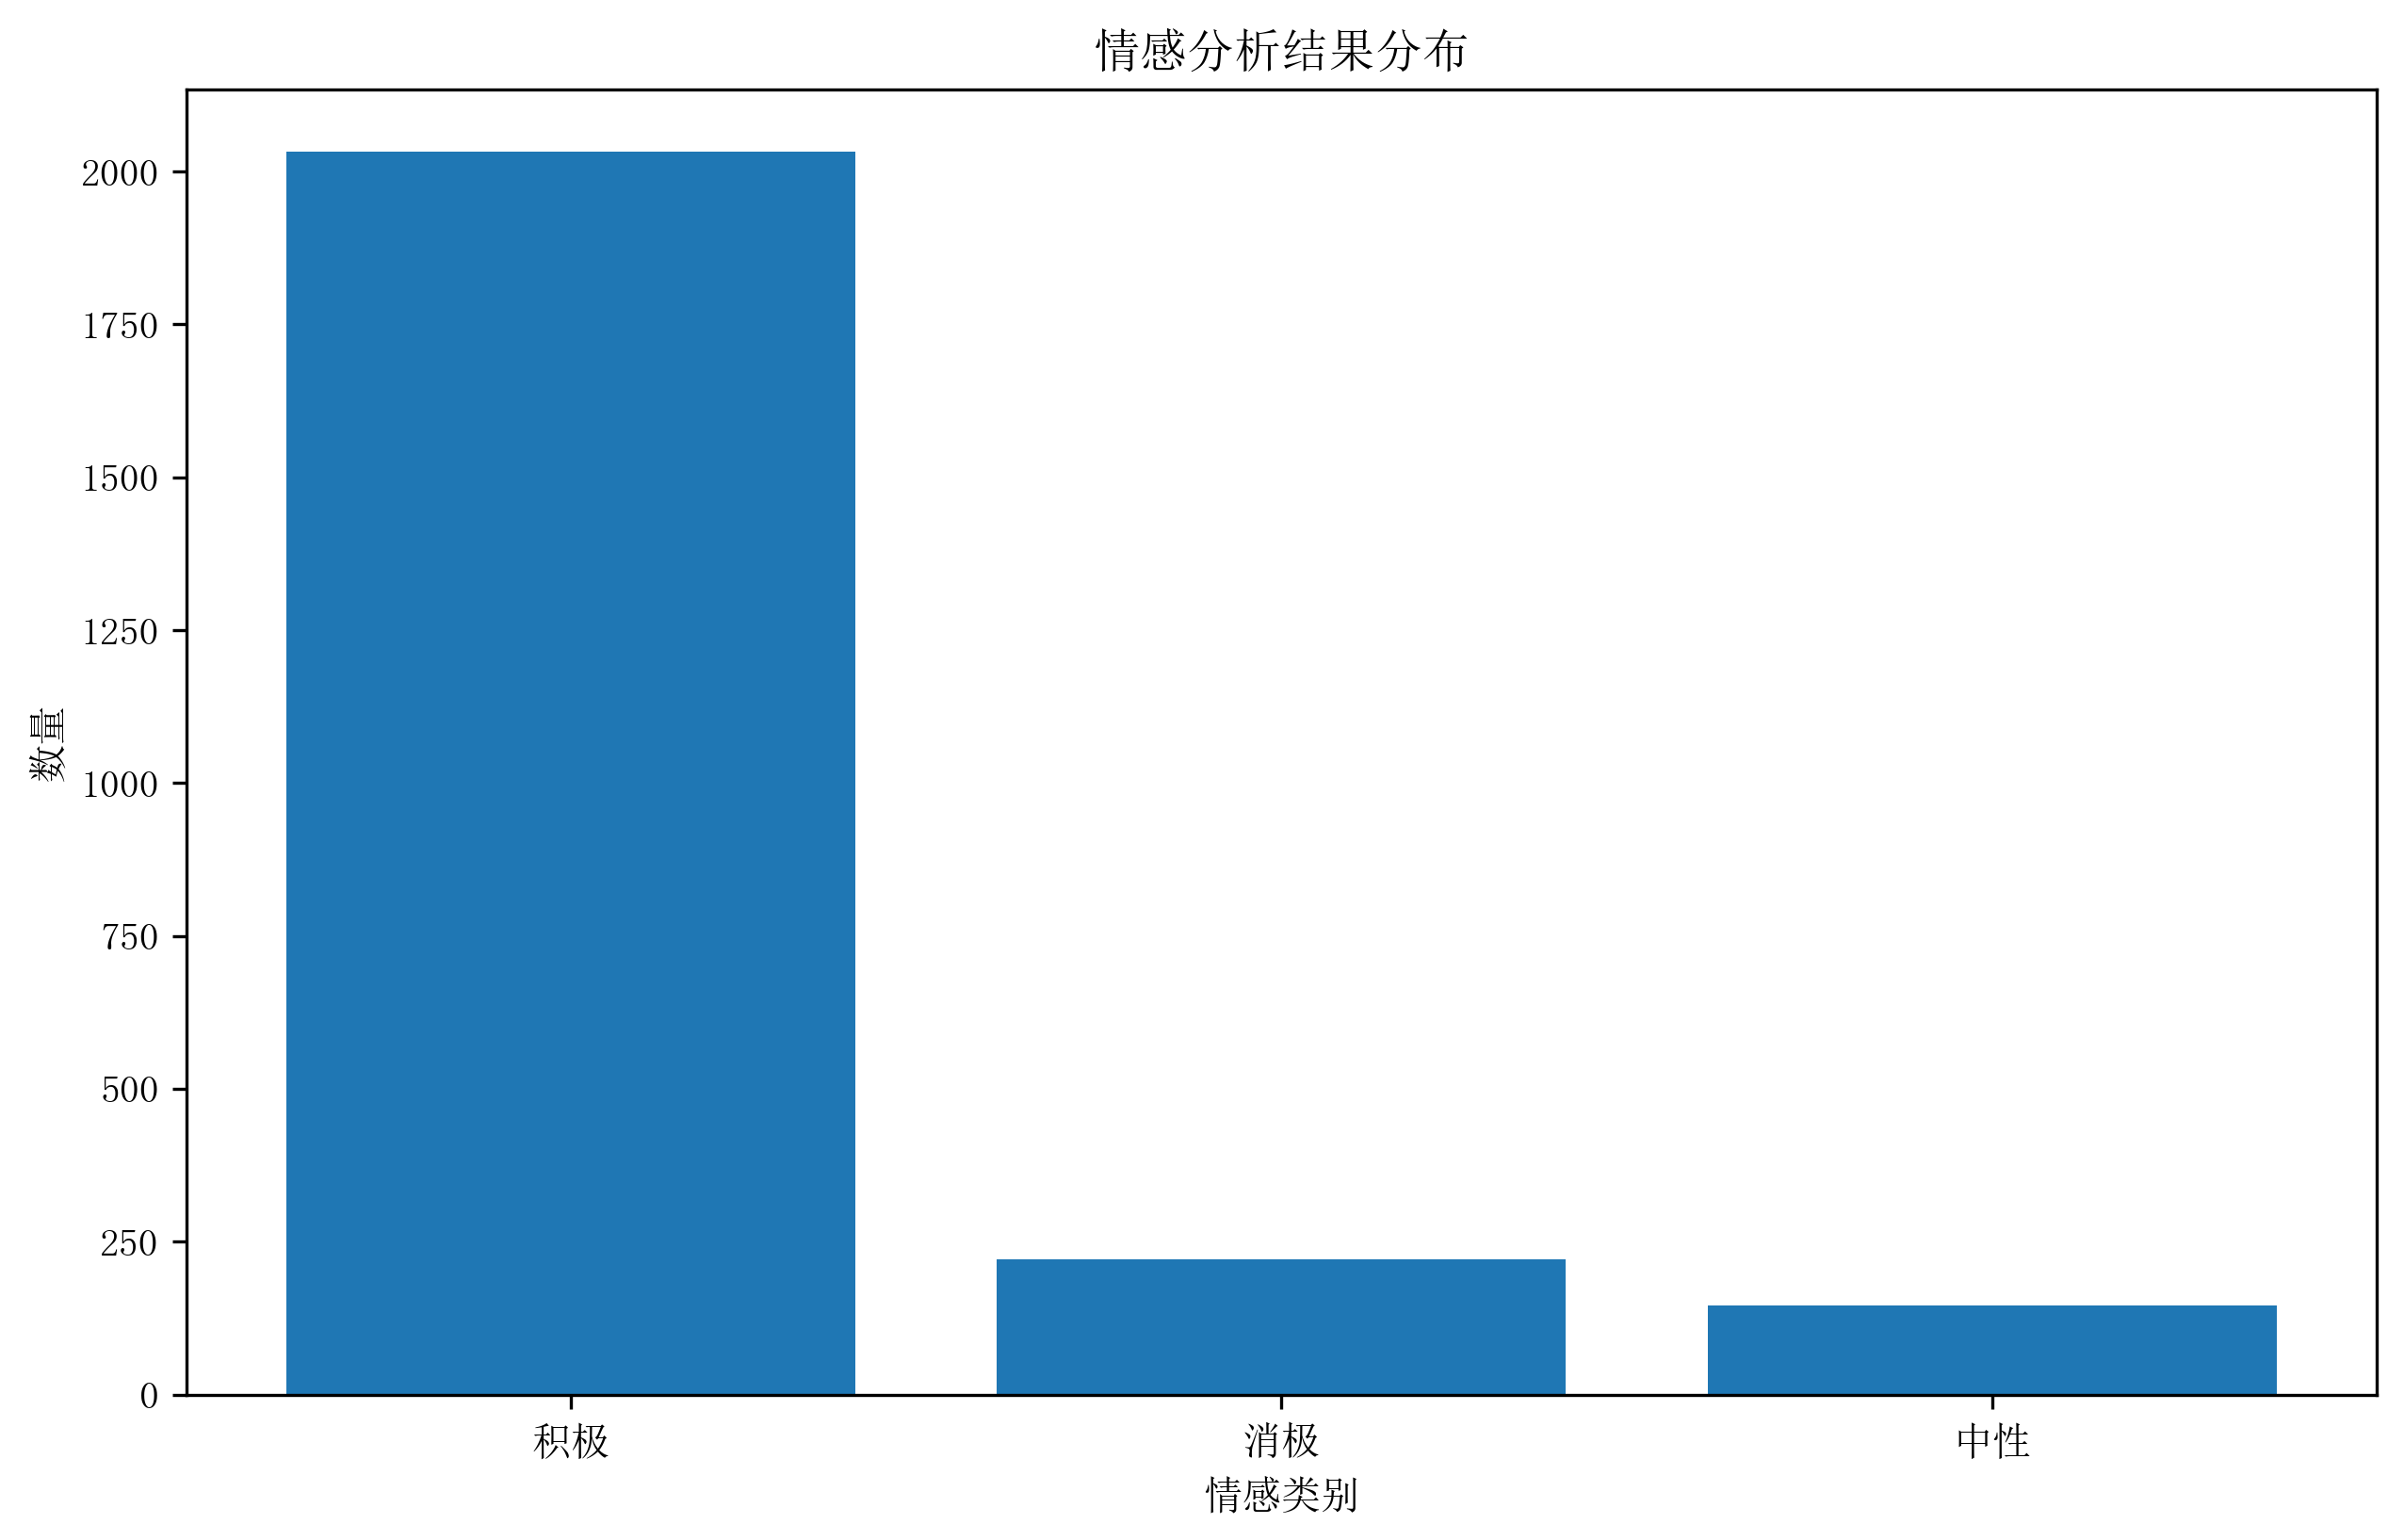

C:\Users\qiao\AppData\Local\Temp\ipykernel_36792\3039744761.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_score'] = df['comment'].apply(lambda x: SnowNLP(x).sentiments)
C:\Users\qiao\AppData\Local\Temp\ipykernel_36792\3039744761.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_category'] = pd.cut(df['sentiment_score'], bins=[0, 0.4, 0.6, 1],


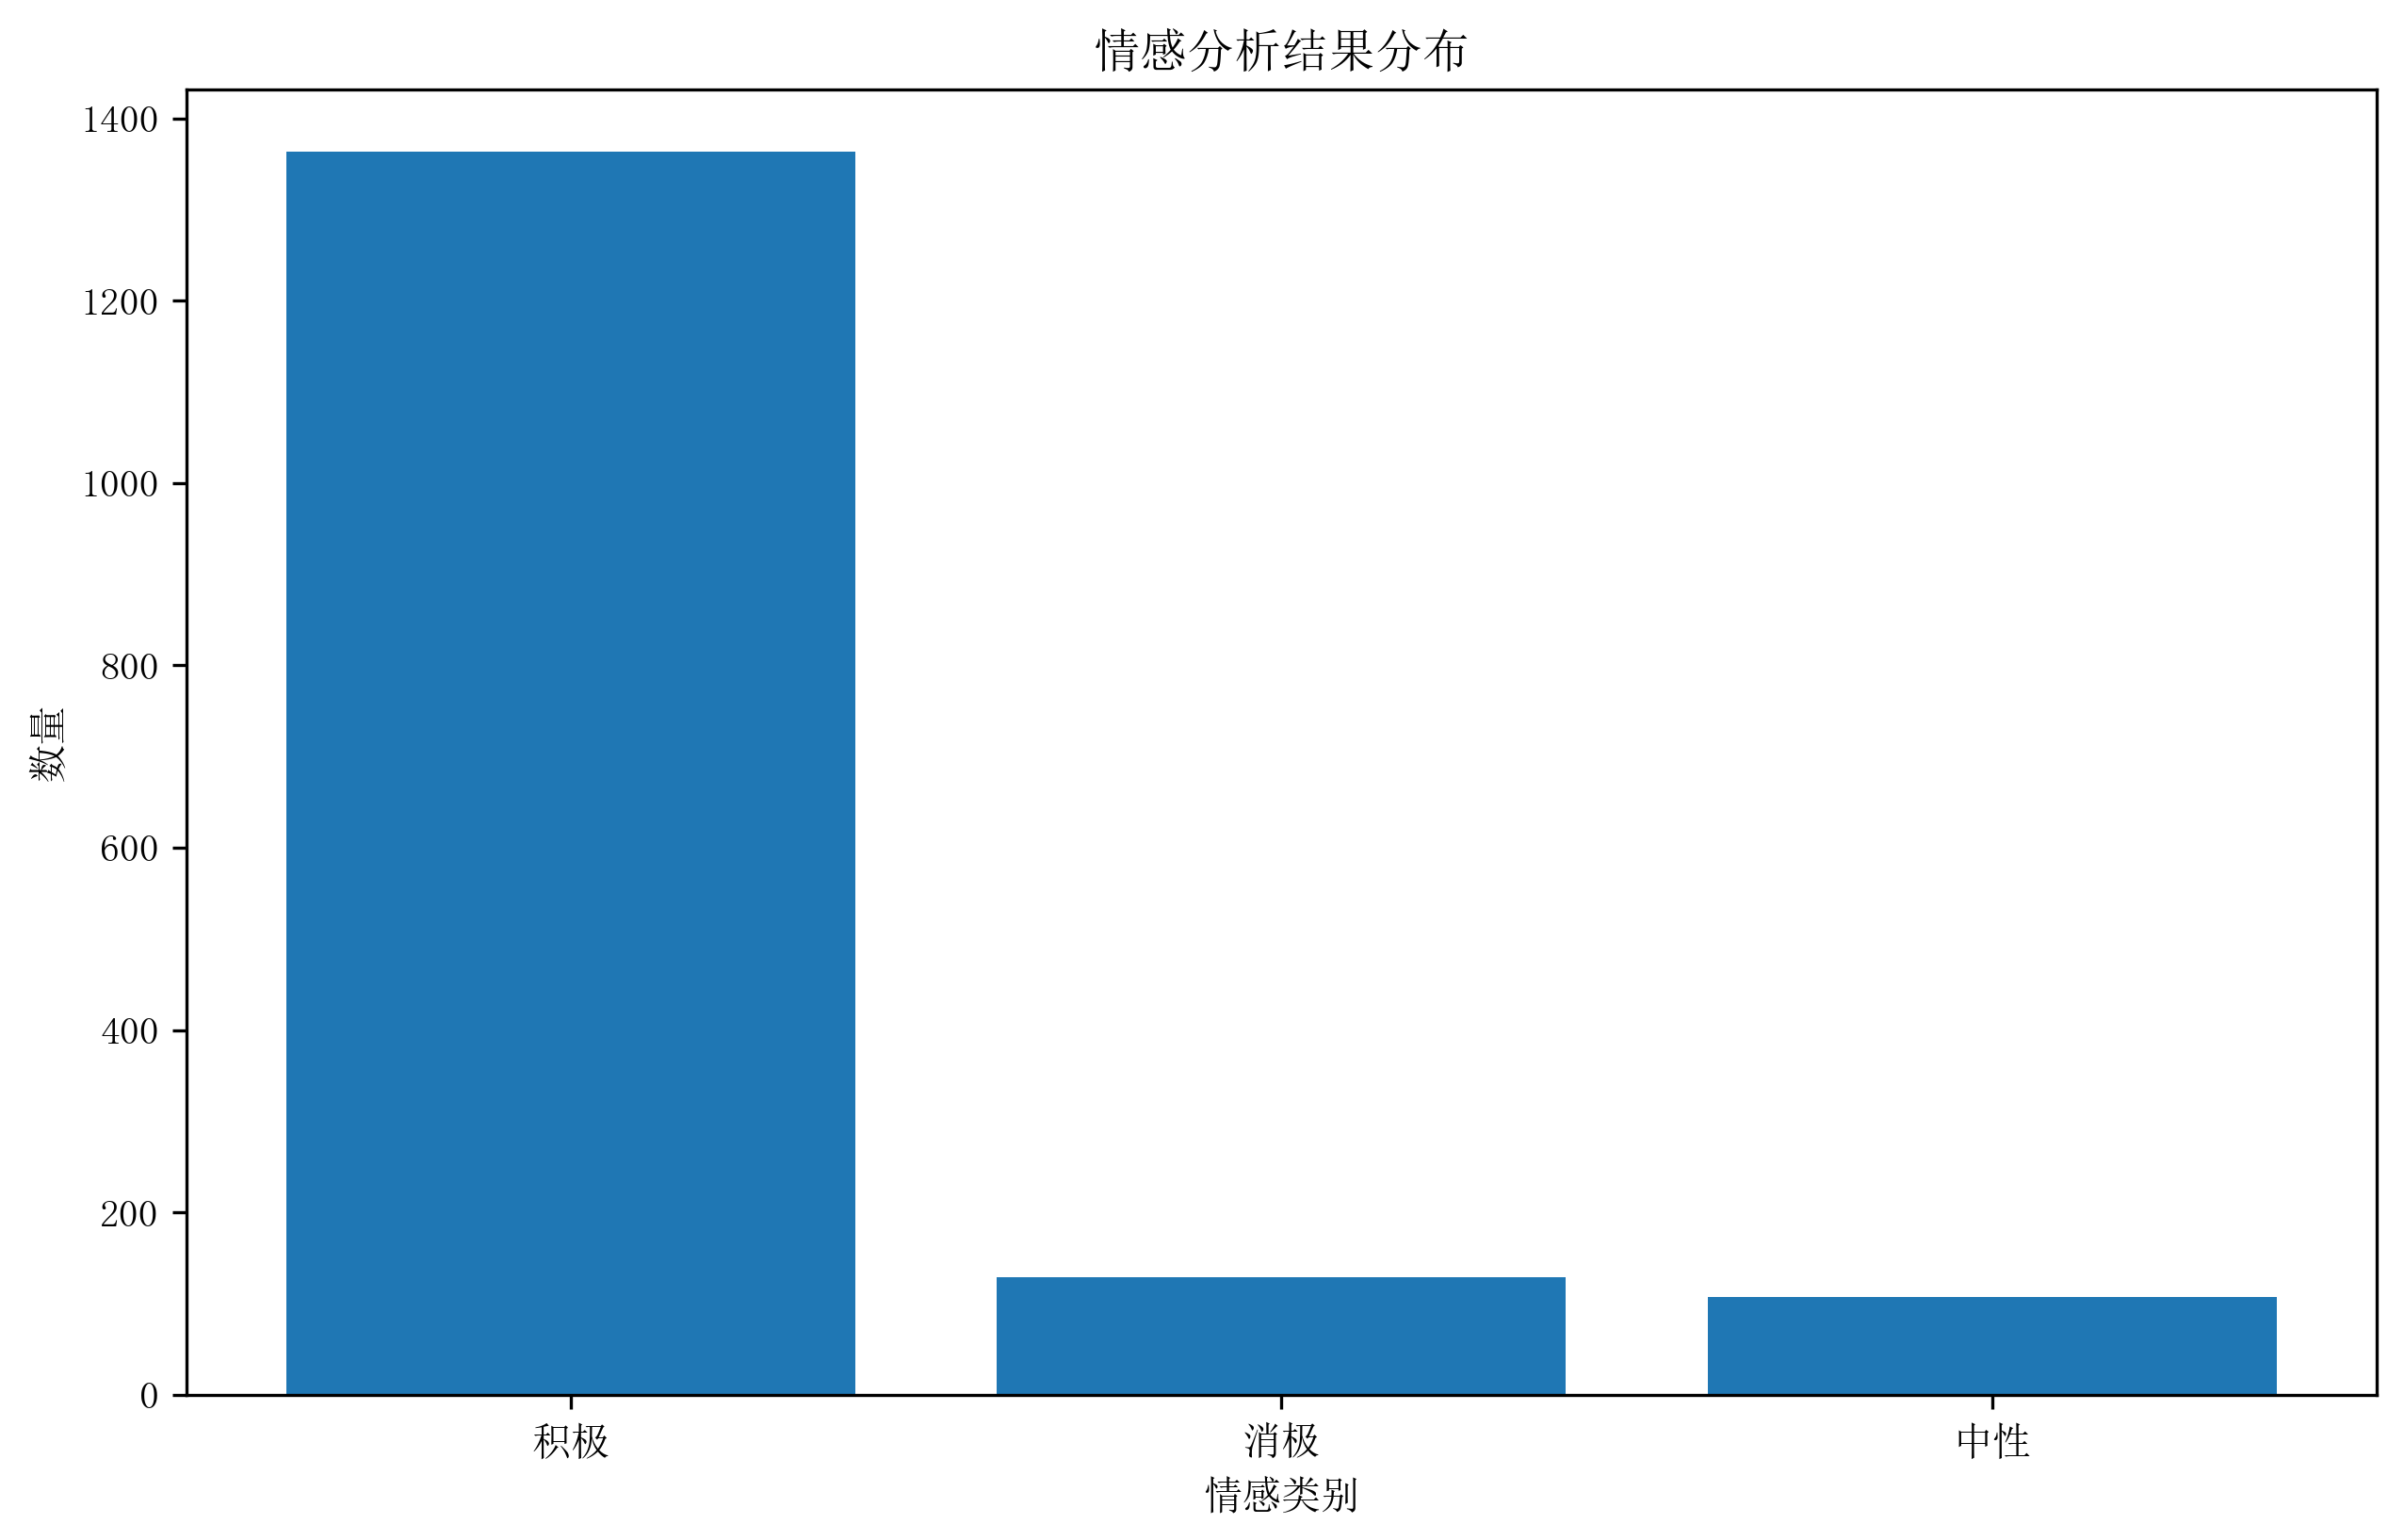

C:\Users\qiao\AppData\Local\Temp\ipykernel_36792\3039744761.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_score'] = df['comment'].apply(lambda x: SnowNLP(x).sentiments)
C:\Users\qiao\AppData\Local\Temp\ipykernel_36792\3039744761.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_category'] = pd.cut(df['sentiment_score'], bins=[0, 0.4, 0.6, 1],


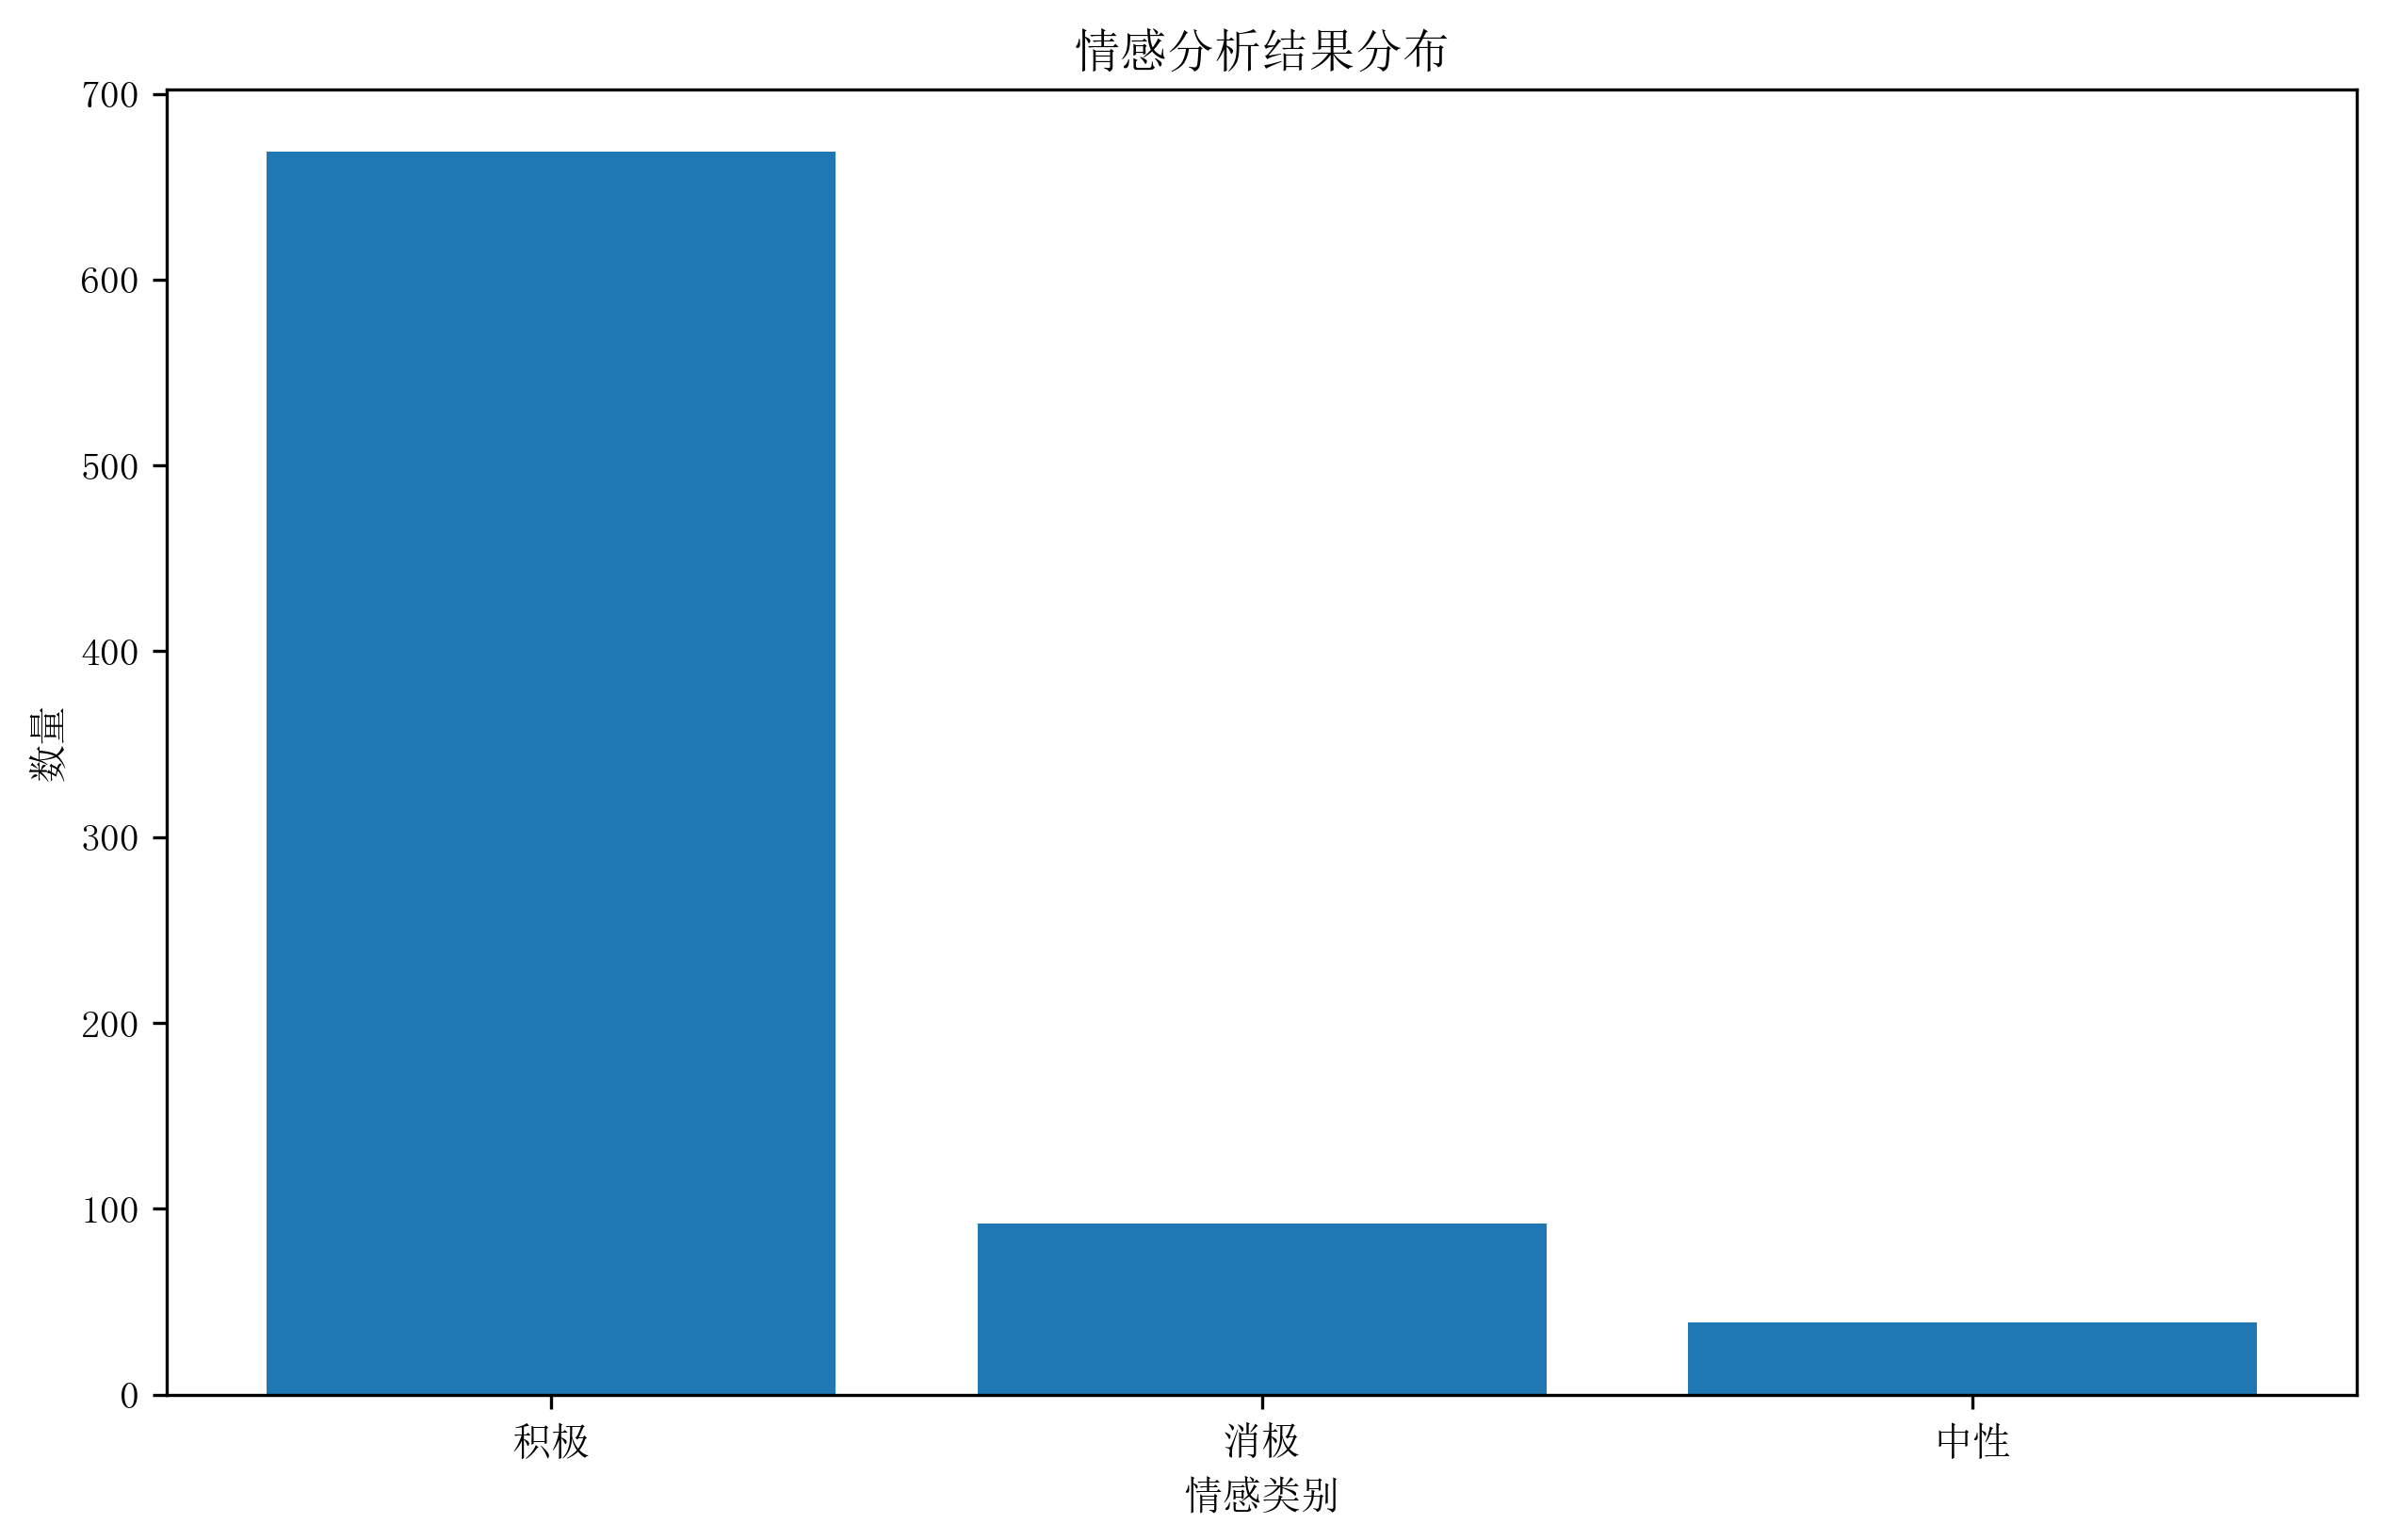

In [19]:
# 情感分析
all_data = sentiment_analysis(all_data)
love_data = sentiment_analysis(love_data)
non_love_data = sentiment_analysis(non_love_data)


In [51]:
# LDA主题模型分析
lda1(all_data)


正在计算不同主题数的一致性得分...


KeyboardInterrupt: 

In [22]:
def lda_b(df):
    texts = [doc.split() for doc in df['preprocessed_text']]
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]

    # 使用主题一致性评分确定最佳主题数
    coherence_values = []
    model_list = []
    print("正在计算不同主题数的一致性得分...")
    
    for num_topics in range(2, 6):  # 尝试2到10个主题
        model = models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=100,  # 固定随机种子，确保结果可复现
            update_every=1,
            chunksize=100,
            passes=10,
            alpha='auto',
            per_word_topics=True
        )
        model_list.append(model)
        
        # 计算主题一致性评分
        coherence_model = CoherenceModel(
            model=model, 
            texts=texts, 
            dictionary=dictionary, 
            coherence='c_v'  # 使用c_v方法评估主题质量
        )
        coherence_values.append(coherence_model.get_coherence())
        print(f'主题数 = {num_topics} 时，一致性得分: {coherence_values[-1]:.4f}')
    
    # 找到最佳主题数（一致性得分最高）
    best_index = coherence_values.index(max(coherence_values))
    best_num_topics = best_index + 2  # 因为range从2开始
    print(f"✓ 最佳主题数: {best_num_topics} (一致性得分: {max(coherence_values):.4f})")
    

    # 使用最佳主题数构建最终模型
    best_lda_model = model_list[best_index]
    
    # 打印每个主题的关键词
    print("\n每个主题的关键词:")
    for idx, topic in best_lda_model.print_topics(-1):
        print(f"主题 {idx+1}: {topic}")
    

    
    # 重新生成可视化数据

    from pyLDAvis import gensim_models
    vis = gensim_models.prepare(best_lda_model, corpus, dictionary)

    
    # 保存可视化结果
    pyLDAvis.save_html(vis, '2.html')
    return best_lda_model

In [ ]:
lda_b(non_love_data)
lda_b(all_data)
lda_b(love_data)

正在计算不同主题数的一致性得分...
主题数 = 2 时，一致性得分: 0.3097
主题数 = 3 时，一致性得分: 0.3513
主题数 = 4 时，一致性得分: 0.3776
主题数 = 5 时，一致性得分: 0.4034
✓ 最佳主题数: 5 (一致性得分: 0.4034)

每个主题的关键词:
主题 1: 0.019*"希望" + 0.018*"自由" + 0.012*"爱" + 0.011*"感动" + 0.009*"救赎" + 0.008*"美好" + 0.007*"影片" + 0.007*"故事" + 0.007*"现实" + 0.007*"记得"
主题 2: 0.014*"世界" + 0.007*"隐喻" + 0.007*"成长" + 0.007*"宫崎骏" + 0.007*"重看" + 0.006*"千寻" + 0.005*"第一次" + 0.005*"婆婆" + 0.005*"懂" + 0.005*"名字"
主题 3: 0.007*"多年" + 0.006*"逼" + 0.005*"is" + 0.004*"of" + 0.004*"the" + 0.004*"a" + 0.004*"生活" + 0.004*"thing" + 0.004*"依旧" + 0.004*"good"
主题 4: 0.015*"忘记" + 0.012*"好看" + 0.011*"画面" + 0.008*"好像" + 0.008*"小时候" + 0.007*"想象力" + 0.007*"分" + 0.007*"值得" + 0.006*"努力" + 0.005*"发生"
主题 5: 0.034*"宫崎骏" + 0.028*"喜欢" + 0.015*"千寻" + 0.011*"无脸" + 0.010*"动画" + 0.010*"经典" + 0.010*"作品" + 0.009*"故事" + 0.009*"动漫" + 0.009*"千与千寻"
